# <center>Задача 5.6a<center>
# <center>Афанасьев Виталий, 610 группа<center>

# Условие задачи

## Построить графики для сигнала $\xi(t)$ и спектра $s(\nu)$ для разных $\tau$.

## Найти коэффициент C в теореме о ширине частотной полосы

# $$ \varepsilon = \frac{\int_{-\Delta\nu}^{\Delta\nu}|S(\nu)|^2d\nu}{\int_{-\infty}^{\infty}|S(\nu)|^2d\nu} = \frac{\int_{-\frac{\Delta t}{2}}^{\frac{\Delta t}{2}}|\xi(t)|^2dt}{\int_{-\infty}^{\infty}|\xi(t)|^2dt}$$

# $$\varepsilon \in \{0,9; \; 0,95\}$$

# $$\Delta t\Delta\nu = C \quad C - ?$$

# Прямоугольный импульс

\begin{equation}
    \xi(t) = 
    \begin{cases}
        a & |t| < \frac{\tau}{2}\\
        0 & |t| > \frac{\tau}{2}
    \end{cases}
\end{equation}

### Спектр:
### $$ S(\omega) = \frac{1}{2\pi}\int_{-\infty}^{\infty}\xi(t)e^{-i\omega t}dt = \frac{a}{2\pi}\int_{-\frac{\tau}{2}}^{\frac{\tau}{2}}e^{-i\omega t}dt = \frac{a}{2\pi i\omega}(e^{i\omega\frac{\tau}{2}} - e^{-i\omega\frac{\tau}{2}}) = \frac{a}{\pi\omega}\sin\omega\frac{\tau}{2}$$

### $$ S(\nu) = \frac{a}{2\pi^2\nu}\sin\pi\nu\tau$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.optimize import root

In [2]:
plt.rc('font', size=20)

In [3]:
a = 1
t = np.linspace(-10, 10, 1000)
nu = np.linspace(-20, 20, 1000)

list_of_tau = [0.5, 2]

In [4]:
def xi(t, tau):
    return a*(np.abs(t) < tau/2)


def s(nu, tau):
    nu = np.where(np.abs(nu)>10**-9, nu, 10**-9)
    return a*np.sin(np.pi*nu*tau)/(2*np.pi**2*nu)

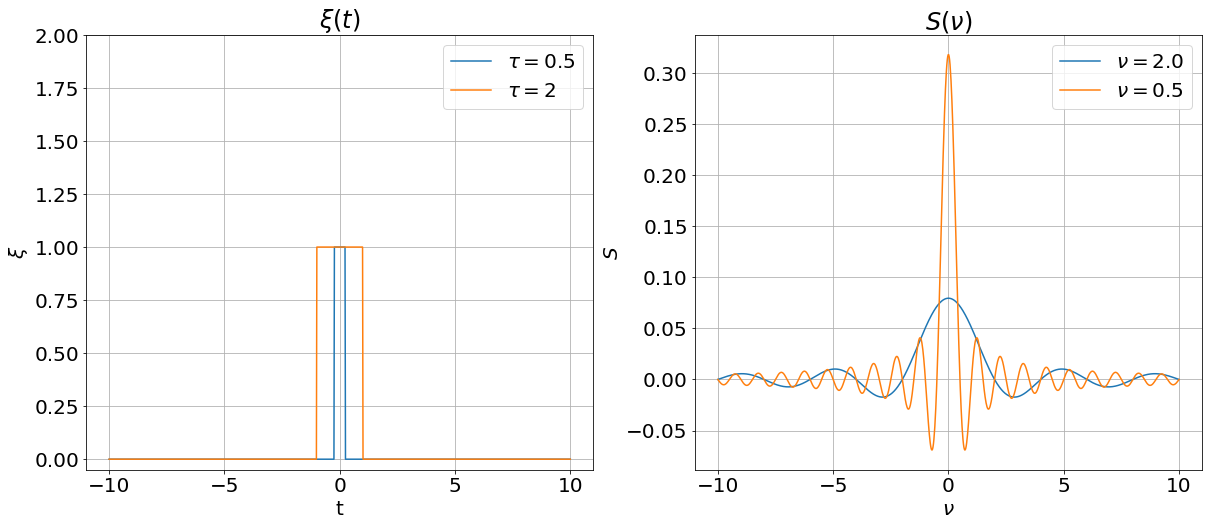

In [5]:
plt.figure(figsize=(20,8))
plt.subplot(1, 2, 1)
plt.title(r"$\xi(t)$")
plt.ylabel(r"$\xi$")
plt.xlabel(r"t")
for tau in list_of_tau:
    plt.plot(t, xi(t, tau))
plt.ylim(-0.05, 2*a)
plt.legend(list(map(float, list_of_tau)))
plt.legend([r"$\tau = $" + str(tau) for tau in list_of_tau])
plt.grid()


plt.subplot(1, 2, 2)
plt.title(r"$S(\nu)$")
plt.ylabel(r"$S$")
plt.xlabel(r"$\nu$")
for tau in list_of_tau:
    plt.plot(t, s(t, tau))
plt.legend([r"$\nu = $" + str(1/tau) for tau in list_of_tau])
plt.grid()

plt.show()

In [6]:
tau = 1
eps = 0.9

int_xi, _ = quad(lambda x: np.abs(xi(x, tau))**2, -np.inf, np.inf)
int_s, _ = quad(lambda x: np.abs(s(x, tau))**2, -np.inf, np.inf, limit=10000)


def delta_t(x):
    return quad(lambda x: np.abs(xi(x, tau))**2, -x/2, x/2)[0]/int_xi - eps


def delta_nu(x):
    return quad(lambda x: np.abs(s(x, tau))**2, -x/2, x/2)[0]/int_s - eps

In [7]:
delta_t = root(delta_t, x0=0).x[0]
delta_nu = root(delta_nu, x0=0).x[0]

In [8]:
print(f"delta t = {delta_t:.3f}")
print(f"delta nu = {delta_nu:.3f}")
print(f"c = {delta_t*delta_nu:.3f}")

delta t = 0.900
delta nu = 1.697
c = 1.527


# Треугольный импульс

\begin{equation}
    \xi(t) = 
    \begin{cases}
        \frac{2a}{\tau}(t+\frac{\tau}{2}) & -\frac{\tau}{2} < t < 0\\
        \frac{2a}{\tau}(\frac{\tau}{2}-t) & 0 < t < \frac{\tau}{2}
    \end{cases}
\end{equation}

### Спектр:
### $$ S(\omega) = \frac{1}{2\pi}\int_{-\infty}^{\infty}\xi(t)e^{-i\omega t}dt =\\= \frac{a}{\pi\tau}\int_{-\frac{\tau}{2}}^{0}te^{-i\omega t}dt - \frac{a}{\pi\tau}\int_{0}^{\frac{\tau}{2}}te^{-i\omega t}dt + \frac{a}{2\pi}\int_{-\frac{\tau}{2}}^{\frac{\tau}{2}}e^{-i\omega t}dt =\\= \frac{a}{\pi\tau w^2} (e^{-i\omega t}(i\omega t + 1)|_{-\frac{\tau}{2}}^{0} - e^{-i\omega t}(i\omega t + 1)|_{0}^{\frac{\tau}{2}}) + \frac{a}{\pi\omega}\sin\omega\frac{\tau}{2} =\\ =\frac{a}{\pi\tau w^2} (2-\tau\omega \sin\omega\frac{\tau}{2}-2\cos\omega\frac{\tau}{2}) + \frac{a}{\pi\omega}\sin\omega\frac{\tau}{2} =\\= \frac{4a}{\pi\tau w^2}\sin^2\frac{\omega\tau}{4}$$

### $$ S(\nu) = \frac{a}{\pi^3\tau\nu^2}\sin^2\frac{\pi\nu\tau}{2}$$

In [9]:
a = 1
t = np.linspace(-10, 10, 1000)
nu = np.linspace(-20, 20, 1000)

list_of_tau = [0.5, 2]

In [10]:
def xi(t, tau):
    return np.where(
        np.abs(t) > tau/2,
        0,
        np.where(t < 0, 2*a*(t+tau/2)/tau, 2*a*(tau/2-t)/tau),
    )


def s(nu, tau):
    nu = np.where(np.abs(nu)>10**-9, nu, 10**-9)
    return a*np.sin(np.pi*nu*tau/2)**2/(np.pi**3*nu**2*tau)

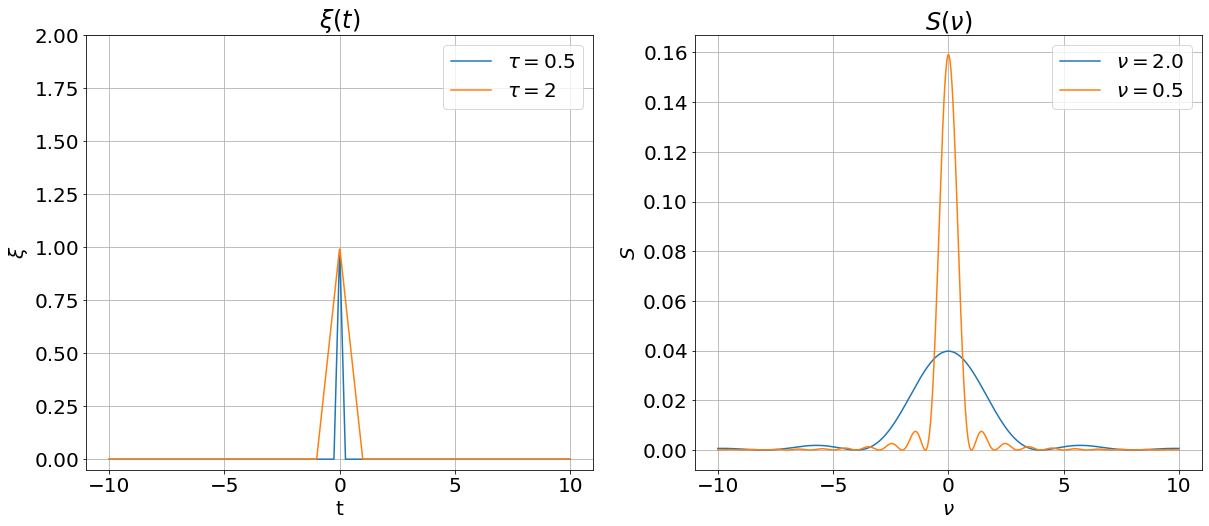

In [11]:
plt.figure(figsize=(20,8))
plt.subplot(1, 2, 1)
plt.title(r"$\xi(t)$")
plt.ylabel(r"$\xi$")
plt.xlabel(r"t")
for tau in list_of_tau:
    plt.plot(t, xi(t, tau))
plt.ylim(-0.05, 2*a)
plt.legend(list(map(float, list_of_tau)))
plt.legend([r"$\tau = $" + str(tau) for tau in list_of_tau])
plt.grid()


plt.subplot(1, 2, 2)
plt.title(r"$S(\nu)$")
plt.ylabel(r"$S$")
plt.xlabel(r"$\nu$")
for tau in list_of_tau:
    plt.plot(t, s(t, tau))
plt.legend([r"$\nu = $" + str(1/tau) for tau in list_of_tau])
plt.grid()

plt.show()

In [12]:
tau = 1
eps = 0.9

int_xi, _ = quad(lambda x: np.abs(xi(x, tau))**2, -np.inf, np.inf)
int_s, _ = quad(lambda x: np.abs(s(x, tau))**2, -np.inf, np.inf, limit=10000)


def delta_t(x):
    return quad(lambda x: np.abs(xi(x, tau))**2, -x/2, x/2)[0]/int_xi - eps


def delta_nu(x):
    return quad(lambda x: np.abs(s(x, tau))**2, -x/2, x/2)[0]/int_s - eps

In [13]:
delta_t = root(delta_t, x0=0).x[0]
delta_nu = root(delta_nu, x0=0).x[0]

In [14]:
print(f"delta t = {delta_t:.3f}")
print(f"delta nu = {delta_nu:.3f}")
print(f"c = {delta_t*delta_nu:.3f}")

delta t = 0.536
delta nu = 1.698
c = 0.910


# Гауссов импульс

\begin{equation}
    \xi(t) = a e^{-\frac{t^2}{\tau^2}}
\end{equation}

### Спектр:
### $$ S(\omega) = \frac{1}{2\pi}\int_{-\infty}^{\infty}\xi(t)e^{-i\omega t}dt = a\int_{-\infty}^{\infty}e^{-\frac{t^2}{\tau^2}}e^{-i\omega t}dt = ae^{-\frac{\omega^2\tau^2}{4}}\int_{-\infty}^{\infty}e^{-(\frac{t}{\tau}+i\omega\frac{\tau}{2})^2}dt = a\tau\sqrt\pi e^{-\frac{\omega^2\tau^2}{4}}$$

### $$ S(\nu) = a\tau\sqrt\pi e^{-\pi^2\nu^2\tau^2}$$

In [15]:
a = 1
t = np.linspace(-10, 10, 1000)
nu = np.linspace(-20, 20, 1000)

list_of_tau = [0.5, 2]

In [16]:
def xi(t, tau):
    return a*np.exp(-t**2/tau**2)

def s(nu, tau):
    nu = np.where(np.abs(nu)>10**-9, nu, 10**-9)
    return a*tau*np.pi**0.5*np.exp(-np.pi**2*nu**2*tau**2)

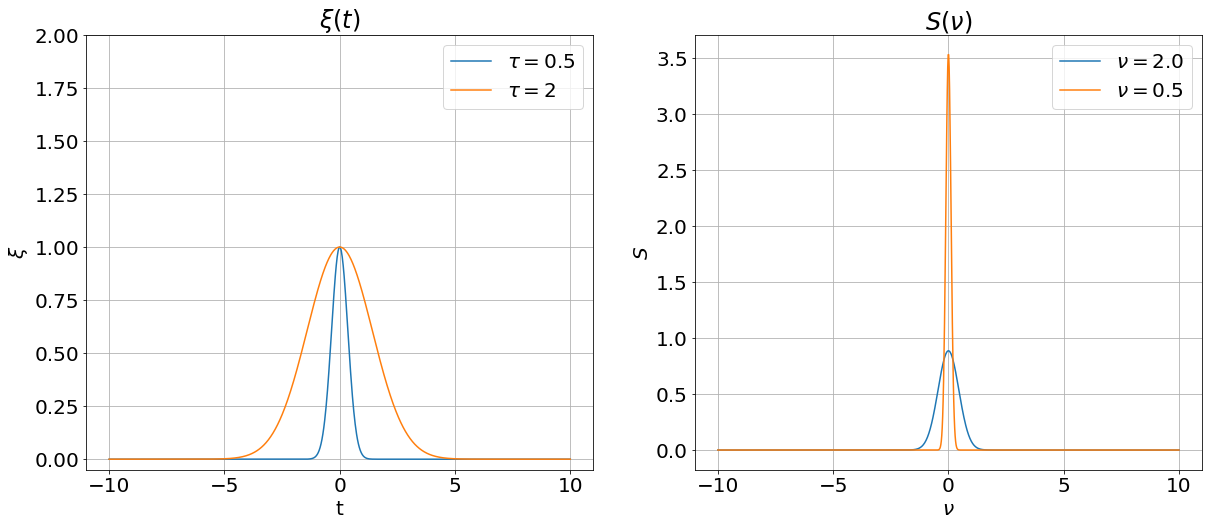

In [17]:
plt.figure(figsize=(20,8))
plt.subplot(1, 2, 1)
plt.title(r"$\xi(t)$")
plt.ylabel(r"$\xi$")
plt.xlabel(r"t")
for tau in list_of_tau:
    plt.plot(t, xi(t, tau))
plt.ylim(-0.05, 2*a)
plt.legend(list(map(float, list_of_tau)))
plt.legend([r"$\tau = $" + str(tau) for tau in list_of_tau])
plt.grid()


plt.subplot(1, 2, 2)
plt.title(r"$S(\nu)$")
plt.ylabel(r"$S$")
plt.xlabel(r"$\nu$")
for tau in list_of_tau:
    plt.plot(t, s(t, tau))
plt.legend([r"$\nu = $" + str(1/tau) for tau in list_of_tau])
plt.grid()

plt.show()

In [18]:
tau = 1
eps = 0.9

int_xi, _ = quad(lambda x: np.abs(xi(x, tau))**2, -np.inf, np.inf)
int_s, _ = quad(lambda x: np.abs(s(x, tau))**2, -np.inf, np.inf, limit=10000)


def delta_t(x):
    return quad(lambda x: np.abs(xi(x, tau))**2, -x/2, x/2)[0]/int_xi - eps


def delta_nu(x):
    return quad(lambda x: np.abs(s(x, tau))**2, -x/2, x/2)[0]/int_s - eps

In [19]:
delta_t = root(delta_t, x0=0).x[0]
delta_nu = root(delta_nu, x0=0).x[0]

In [20]:
print(f"delta t = {delta_t:.3f}")
print(f"delta nu = {delta_nu:.3f}")
print(f"c = {delta_t*delta_nu:.3f}")

delta t = 1.645
delta nu = 0.524
c = 0.861
